In [1]:
import pandas as pd
import numpy as np

dataset import


DATASET

In [44]:
df=pd.read_csv('Big Sales Data.csv')

In [45]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [46]:
df['Item_Identifier'].nunique()

1559

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [76]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

<ipython-input-76-2bb370b17d6f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)


In [79]:

if 'Outlet_Size' in df.columns:
    # If it is, convert it to Categorical
    df['Outlet_Size'] = pd.Categorical(df['Outlet_Size'])
else:
    # If not, print an error message
    print("Column 'Outlet_Size' not found in the DataFrame.")

Column 'Outlet_Size' not found in the DataFrame.


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  int64   
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  int64   
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  int64   
 7   Outlet_Establishment_Year  14204 non-null  int64   
 8   Outlet_Size                14204 non-null  category
 9   Outlet_Location_Type       14204 non-null  int64   
 10  Outlet_Type                14204 non-null  int64   
 11  Item_Outlet_Sales          14204 non-null  float64 
dtypes: category(1), float64(4), int64(6), object(1)
memory usage: 1.2+ MB


In [51]:
# prompt: use a one-hot encoder to transform the "Outlet_Size" column

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the Outlet_Size column
encoded_outlet_size = encoder.fit_transform(df[['Outlet_Size']]).toarray()

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_outlet_size, columns=encoder.get_feature_names_out(['Outlet_Size']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Remove the original Outlet_Size column if desired
df = df.drop('Outlet_Size', axis=1)



coloumn names

In [52]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  int64  
 9   Outlet_Type                14204 non-null  int64  
 10  Item_Outlet_Sales          14204 non-null  float64
 11  Outlet_Size_High           14204 non-null  float64
 12  Outlet_Size_Medium         14204 non-null  float64
 13  Outlet_Size_Small          14204 non-null  flo

In [53]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.353351,0.065953,0.208814,141.004977,4.128415,1997.830681,1.112856,1.201281,2185.836320,0.109335,0.501408,0.389257
std,4.251186,0.478027,0.051459,0.452384,62.086938,2.717103,8.371664,0.812755,0.796543,1827.479550,0.312071,0.500016,0.487599
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,33.290000,0.000000,0.000000,0.000000
25%,9.300000,0.000000,0.027036,0.000000,94.012000,2.000000,1987.000000,0.000000,1.000000,922.135101,0.000000,0.000000,0.000000
50%,12.800000,0.000000,0.054021,0.000000,142.247000,4.000000,1999.000000,1.000000,1.000000,1768.287680,0.000000,1.000000,0.000000
75%,16.000000,1.000000,0.094037,0.000000,185.855600,6.000000,2004.000000,2.000000,1.000000,2988.110400,0.000000,1.000000,1.000000
max,30.000000,1.000000,0.328391,2.000000,266.888400,9.000000,2009.000000,2.000000,3.000000,31224.726950,1.000000,1.000000,1.000000


missing values


In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  int64  
 9   Outlet_Type                14204 non-null  int64  
 10  Item_Outlet_Sales          14204 non-null  float64
 11  Outlet_Size_High           14204 non-null  float64
 12  Outlet_Size_Medium         14204 non-null  float64
 13  Outlet_Size_Small          14204 non-null  flo

In [55]:
df.describe()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.353351,0.065953,0.208814,141.004977,4.128415,1997.830681,1.112856,1.201281,2185.836320,0.109335,0.501408,0.389257
std,4.251186,0.478027,0.051459,0.452384,62.086938,2.717103,8.371664,0.812755,0.796543,1827.479550,0.312071,0.500016,0.487599
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,33.290000,0.000000,0.000000,0.000000
25%,9.300000,0.000000,0.027036,0.000000,94.012000,2.000000,1987.000000,0.000000,1.000000,922.135101,0.000000,0.000000,0.000000
50%,12.800000,0.000000,0.054021,0.000000,142.247000,4.000000,1999.000000,1.000000,1.000000,1768.287680,0.000000,1.000000,0.000000
75%,16.000000,1.000000,0.094037,0.000000,185.855600,6.000000,2004.000000,2.000000,1.000000,2988.110400,0.000000,1.000000,1.000000
max,30.000000,1.000000,0.328391,2.000000,266.888400,9.000000,2009.000000,2.000000,3.000000,31224.726950,1.000000,1.000000,1.000000


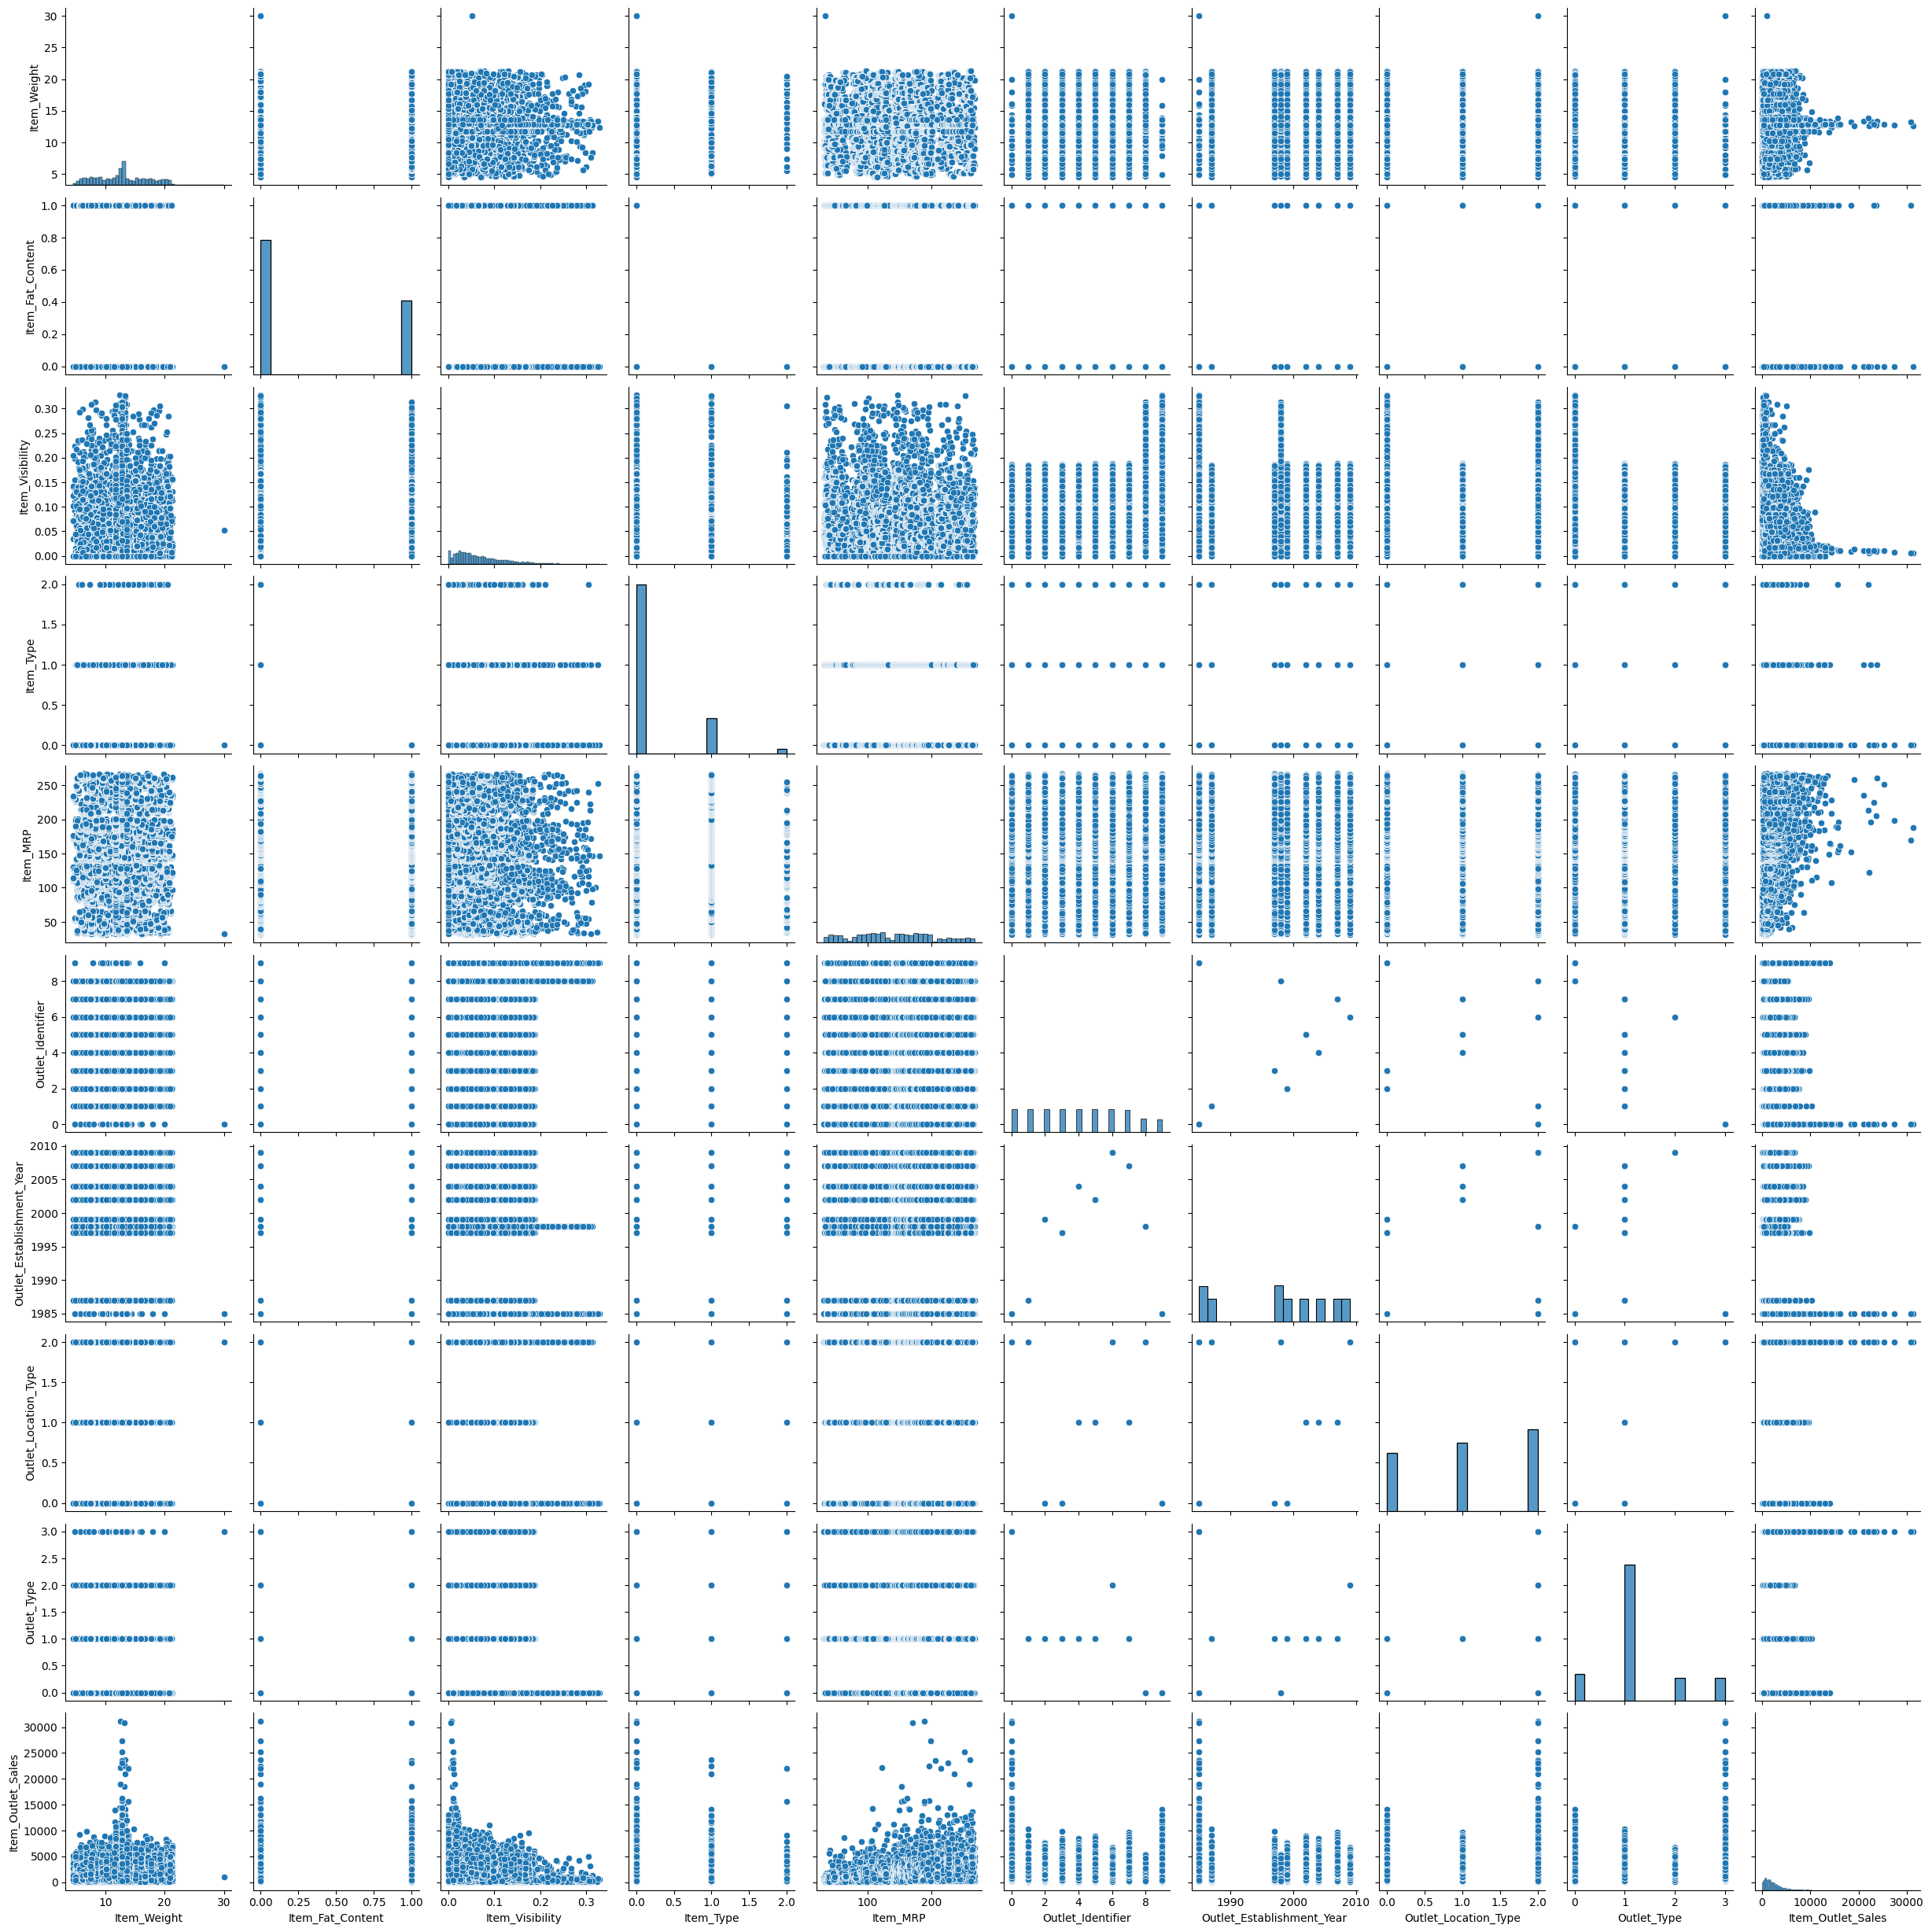

In [20]:
import seaborn as sns
sns.pairplot(df)


categories and categorical values

In [56]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Location_Type,0
Outlet_Type,0


In [22]:
df[['Item_Identifier']].value_counts()

,count
Item_Identifier,
FDQ08,10
FDO24,10
FDQ19,10
FDQ28,10
FDQ31,10
...,...
FDM52,7
FDM50,7
FDL50,7


In [23]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
0,9185
1,5019


dataframe **shape**

In [24]:
df.shape

(14204, 12)

y=**dependant**,x=**independant**

In [57]:
y=df['Item_Outlet_Sales']

In [26]:
y.shape

(14204,)

In [27]:
y

,Item_Outlet_Sales
0,436.608721
1,443.127721
2,564.598400
3,1719.370000
4,352.874000
...,...
14199,4984.178800
14200,2885.577200
14201,2885.577200
14202,3803.676434


In [58]:
x=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [29]:
x.shape

(14204, 10)

In [30]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,2,1999,Medium,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,Medium,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,Medium,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,Small,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,Medium,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,4,2004,Small,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,Medium,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,High,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,Medium,2,3


**standarize x**

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()

In [61]:
x_std=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [62]:
x_std=sc.fit_transform(x_std)

In [63]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [64]:
x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=pd.DataFrame(x_std,columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'])

In [65]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,-0.115417,0,0.884136,0,-1.731787,2,0.139681,0,1,0.0,1.0,0.0
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,0.0,1.0,0.0
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,2,2,0.0,1.0,0.0
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0.0,0.0,1.0
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,4,0.736955,1,1,0.0,0.0,1.0
14200,0.002201,0,0.078898,0,1.962160,7,1.095319,1,1,0.0,1.0,0.0
14201,0.002201,0,0.070120,0,1.965381,1,-1.293777,2,1,1.0,0.0,0.0
14202,0.204448,0,0.064694,0,1.973435,0,-1.532686,2,3,0.0,1.0,0.0


**train test split**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2529)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12783, 12), (1421, 12), (12783,), (1421,))

**model train**

In [69]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=2529)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=2529)

In [70]:
y_pred=rfr.predict(x_test)

In [ ]:
y_pred.shape

**evalution**

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [72]:
mean_squared_error(y_test,y_pred)

1606696.3215132703

In [73]:
mean_absolute_error(y_test,y_pred)

829.3514094227944

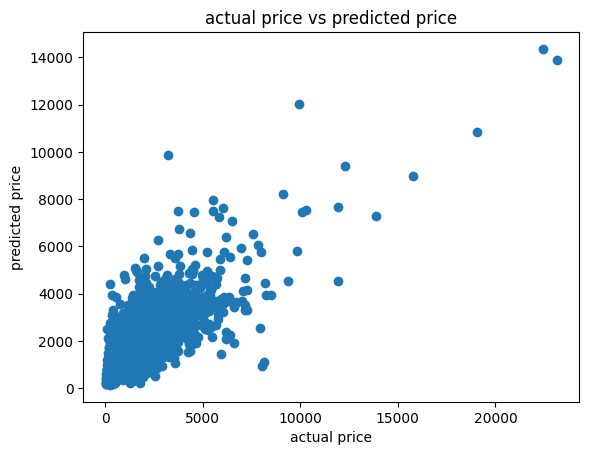

In [74]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.show()